<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Classifiers---Part-Five" data-toc-modified-id="Image-Classifiers---Part-Five-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Classifiers - Part Five</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li><li><span><a href="#Develop-the-model" data-toc-modified-id="Develop-the-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Develop the model</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-data-sets" data-toc-modified-id="Import-libraries-and-data-sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import libraries and data sets</a></span></li><li><span><a href="#Inspect-the-data" data-toc-modified-id="Inspect-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Inspect the data</a></span></li><li><span><a href="#Build-helper-functions" data-toc-modified-id="Build-helper-functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Build helper functions</a></span><ul class="toc-item"><li><span><a href="#Initialize-the-tensors" data-toc-modified-id="Initialize-the-tensors-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Initialize the tensors</a></span></li><li><span><a href="#Forward-propagation" data-toc-modified-id="Forward-propagation-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Forward propagation</a></span></li><li><span><a href="#Loss-function" data-toc-modified-id="Loss-function-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Loss function</a></span></li><li><span><a href="#Create-minibatches" data-toc-modified-id="Create-minibatches-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Create minibatches</a></span></li></ul></li><li><span><a href="#Create-the-actual-model" data-toc-modified-id="Create-the-actual-model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Create the actual model</a></span></li></ul></li><li><span><a href="#Try-it-out" data-toc-modified-id="Try-it-out-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Try it out</a></span><ul class="toc-item"><li><span><a href="#First-attempt,-no-dropout" data-toc-modified-id="First-attempt,-no-dropout-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>First attempt, no dropout</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Second-attempt-with-dropout" data-toc-modified-id="Second-attempt-with-dropout-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Second attempt with dropout</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li></ul></li><li><span><a href="#Next-steps" data-toc-modified-id="Next-steps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Next steps</a></span></li></ul></div>

<h1 style="text-align: center;">Image Classifiers - Part Five</h1>

## Introduction

<img style="float: left; margin-right: 25px;" src="images/catMonocle.jpg" />

The overall goal of this series of write-ups is to explore a number of models performing binary classification on a given set of images.  In this sixth write-up we move from creating models from scratch to utilizing the TensorFlow framework.  

The goal of this write-up is to emulate what we've done in the [most recent from scratch model](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/P03-Image-Classifiers-Mar-2018/BinaryImageClassifier-PartFour.ipynb) utilizing TensorFlow, achieve at least the same performance and results as we had before, and pave the way to continue work in TensorFlow and Keras.  The end result should be an N-layer neural network in TensorFlow that supports:

*  Drop out regularization
*  Mini-batch gradient descent
*  Adam optimization

So, let's get started!


# Develop the model

## Import libraries and data sets

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
np.random.seed(10)

import random 
random.seed(10)

from os import path
import math
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import h5py
import tensorflow as tf
from tensorflow.python.framework import ops

from utils import *

In [3]:
# Load, shape, and normalize the data used for training the model
imageData = path.join("datasets", "imageData500_64pixels.hdf5")

with h5py.File(imageData, "r") as archive:   
    trainingData = np.squeeze(archive["trainData"][:])
    testData = np.squeeze(archive["testData"][:])
    trainingLabels = np.array(archive["trainLabels"][:])
    testLabels = np.array(archive["testLabels"][:])
    archive.close()

# Reshape the training and test data and label matrices
trainingData = trainingData.reshape(trainingData.shape[0], -1).T
testData = testData.reshape(testData.shape[0], -1).T

# Normalization
trainingData = trainingData/255.
testData = testData/255.

print("trainingData.shape = ", trainingData.shape)
print("trainingLabels.shape = ", trainingLabels.shape)
print("testData.shape = ", testData.shape)
print("testLabels.shape = ", testLabels.shape)

trainingData.shape =  (12288, 800)
trainingLabels.shape =  (1, 800)
testData.shape =  (12288, 200)
testLabels.shape =  (1, 200)


## Inspect the data

*** KEYS
HDF5 container keys: ['testData', 'testLabels', 'trainData', 'trainLabels']

*** LABELS
Total number of training labels: 800
Number of cat labels: 396
Number of object labels: 404
First 10 training labels: [0 0 1 1 1 1 1 1 0]


Total number of testing labels: 200
Number of cat labels: 104
Number of object labels: 96
First 10 testing labels: [1 1 0 0 1 1 0 0 0]


*** IMAGE DATA
Image data shape in archive: (800, 64, 64, 3)


First HDF5 container dataSet item shape: (64, 64, 3)
Image data shape after flattening: (192, 64)
First 10 dataSet item matrix values: []


Recreating and showing first 20 images from flattened matrix values:



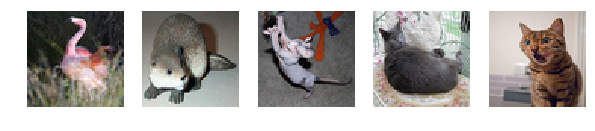

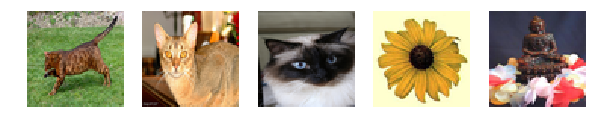

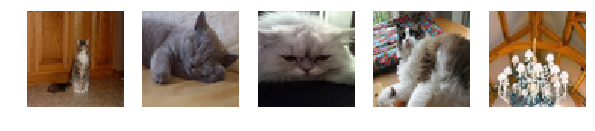

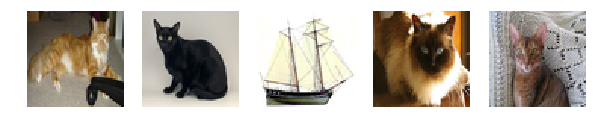

In [4]:
# Examine the data used for training the model
imageData = path.join("datasets", "imageData500_64pixels.hdf5")
validateArchive(imageData)

## Build helper functions

### Initialize the tensors

In the previous model we utilized "He initialization," because we were implimenting ReLu activations for the hidden layers.  We'd like to do the same sort of initialization in our TensorFlow model as well.

A quick search on Google provided [this link](https://stats.stackexchange.com/questions/319323/whats-the-difference-between-variance-scaling-initializer-and-xavier-initialize), and so below you'll notice we are calling the `tf.variance_scaling_initializer` method to populate the `W` coefficients matrix values.

Links:
*  [He initialization and ReLu](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf)
*  [tf.variance_scaling_initializer](https://www.tensorflow.org/api_docs/python/tf/variance_scaling_initializer)

In [5]:
#  Initialize model params (i.e. W and b)
def initilizeParameters(dimensionDict):

    params = {}
    lastDimSize = dimensionDict["numberInputs"]
    
    for index, size in enumerate(dimensionDict['hiddenLayerSizes'], start=1):
        wName = "w" + str(index)
        bName = "b" + str(index)
        
        # Initialize utilizing "He Initialization"
        params[wName] = tf.get_variable(wName, [size, lastDimSize], initializer = tf.variance_scaling_initializer(seed = 1))
        params[bName] = tf.get_variable(bName, [size, 1], initializer = tf.zeros_initializer())
        
        lastDimSize = size
      
    return params

Some quick santify check testing:

In [6]:
dimensionDict = {}
dimensionDict["numberInputs"] = trainingData.shape[0]
dimensionDict['hiddenLayerSizes'] = [25, 12, 6]

tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initilizeParameters(dimensionDict)
    print(parameters)

{'w1': <tf.Variable 'w1:0' shape=(25, 12288) dtype=float32_ref>, 'b1': <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>, 'w2': <tf.Variable 'w2:0' shape=(12, 25) dtype=float32_ref>, 'b2': <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>, 'w3': <tf.Variable 'w3:0' shape=(6, 12) dtype=float32_ref>, 'b3': <tf.Variable 'b3:0' shape=(6, 1) dtype=float32_ref>}


### Forward propagation

Definitely getting spoiled here with TensorFlow!  The `forwardProp` function is almost a third of the size of the one we coded by hand.

Another big difference is we don't apply the sigmoid activation to the `Z` values of the last layer.  That's actually done in a separate step in the actual model code which is found later on.

In [11]:
def fowardProp(x, params, keepProb):
    
    print(keepProb)
    
    length = len(params) // 2
    a = x
    
    for i in range(1, (length+1), 1):
        w = params["w" + str(i)]
        b = params["b" + str(i)]
        
        z = tf.add(tf.matmul(w, a), b)
        if (i != length):
            a = tf.nn.dropout(tf.nn.relu(z), keepProb)
    
    return z

### Loss function

In [8]:
def calculateCost(zL, y):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = tf.transpose(zL), labels = tf.transpose(y)))
    
    return cost

### Create minibatches

In [9]:
def createMiniBatches(data, labels, batchSize, seed):  
    m = data.shape[1]
    miniBatches = []
    
    # Shuffle the data and labels
    np.random.seed(seed)
    permutation = list(np.random.permutation(m))
    
    shuffledData = data[:, permutation]
    shuffledLabels = labels[:, permutation].reshape((1,m))
    
    # Create the mini batches
    # First take all the groupings that fit into the "batchSize" bucket
    batches = math.floor(m / batchSize)
    for i in range(0, batches):
        batchData = shuffledData[:, i * batchSize : (i + 1) * batchSize]
        batchLabels = shuffledLabels[:, i * batchSize : (i + 1) * batchSize]
        miniBatch = (batchData, batchLabels)
        miniBatches.append(miniBatch)
        
    # Next take the final grouping of records that are left over
    if m % batchSize != 0:
        batchData = shuffledData[:, batches * batchSize : m]
        batchLabels = shuffledLabels[:, batches * batchSize : m]
        miniBatch = (batchData, batchLabels)
        miniBatches.append(miniBatch)
        
    return miniBatches

## Create the actual model

In [10]:
# Define the actual neural network classification model
def model(trainingData, trainingLabels, testData, testLabels, dimensionDict, learningRate, epochs, batchSize, keepProb, printCosts = False):
    
    # Init vars
    # Used to ensure our minibatches give different combinations each time
    seed = 10
    
    # Allows us to run the model multiple times w/out errors about tensors already existing...
    ops.reset_default_graph()
    
    # We need two tensors:  One for the data, and one for the labels
    x = tf.placeholder(tf.float32, shape = [trainingData.shape[0],   None], name = "x")
    y = tf.placeholder(tf.float32, shape = [trainingLabels.shape[0], None], name = "y")
    
    # And another tensor for the dropout regularization probability
    tfKeepProb = tf.placeholder(tf.float32)
    
    # Initialize tensors
    params = {}
    params = initilizeParameters(dimensionDict) 
    
    
    # Define the operations on the tensors...
    
    # Forward prop
    zL = fowardProp(x, params, tfKeepProb)
    #zL = fowardProp(x, params)
    
    # Cost
    cost = calculateCost(zL, y)
    
    # Backward prop
    optimizer = tf.train.AdamOptimizer(learning_rate = learningRate).minimize(cost)
    
    #Predictions
    yHat = tf.sigmoid(zL) 
    threshold = tf.constant(0.5)
    delta = tf.abs(y - yHat)
    correct = tf.cast(tf.less(delta, threshold), tf.int32)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    # Initialize global variables in the graph.
    init = tf.global_variables_initializer()
    
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Track model costs and accuracy rates
        modelCosts = []
        trainAcc = []
        testAcc = []
               
        # Train the model 'epoch' number of times
        for e in range(epochs):      
            
            # Create the mini batches
            eCost = 0
            seed = seed + 1
            miniBatches = createMiniBatches(trainingData, trainingLabels, batchSize, seed)
            
            for batch in miniBatches:
                
                # Assign the batch data & labels, and then train the model
                (batchData, batchLabels) = batch
                _ , batchCost = sess.run([optimizer, cost], feed_dict={x: batchData,  y: batchLabels, tfKeepProb: keepProb})
                
                # Record the cost, but account for the fact we are only looking at a portion of the data
                eCost += batchCost / len(miniBatches)

            # Give the user some output every N number of epochs
            if printCosts == True and e % 100 == 0:
                print ("Cost after epoch %i: %f" % (e, eCost))
                trainAcc.append(accuracy.eval({x: trainingData, y: trainingLabels, tfKeepProb: keepProb}))
                testAcc.append(accuracy.eval({x: testData, y: testLabels, tfKeepProb: 1.0}))
            
            # Record model cost every N number of epochs
            if printCosts == True and e % 5 == 0:
                modelCosts.append(eCost)
                
        print("----------")
        print ("Train Accuracy:", accuracy.eval({x: trainingData, y: trainingLabels, tfKeepProb: keepProb}))
        print ("Test Accuracy:", accuracy.eval({x: testData, y: testLabels, tfKeepProb: 1.0}))
                         
    # Plot the cost
    plt.plot(np.squeeze(modelCosts))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per every 5 epochs)')
    plt.title("Learning rate =" + str(learningRate))
    plt.show()
    
    return modelCosts, trainAcc, testAcc
    

# Try it out

## First attempt, no dropout

Tensor("Placeholder:0", dtype=float32)
Cost after epoch 0: 2.147223
Cost after epoch 100: 0.253618
Cost after epoch 200: 0.083190
Cost after epoch 300: 0.025467
Cost after epoch 400: 0.006699
Cost after epoch 500: 0.001082
Cost after epoch 600: 0.000314
----------
Train Accuracy: 1.0
Test Accuracy: 0.71


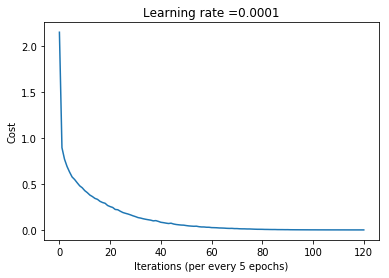

In [95]:
# Three layer NN
dimensionDict = {}
dimensionDict["numberInputs"] = 12288
dimensionDict['hiddenLayerSizes'] = [25, 12, 1]

modelCosts, trainAcc, testAcc = model(trainingData, trainingLabels, testData, testLabels, dimensionDict, 0.0001, 601, 50, 1.0, True)

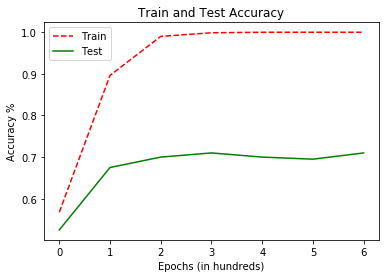

In [96]:
plt.xlabel('Epochs (in hundreds)')
plt.ylabel('Accuracy %')
plt.plot(np.squeeze(trainAcc), 'r--', np.squeeze(testAcc), 'g')
plt.title('Train and Test Accuracy')
plt.legend(['Train', 'Test'])

plt.show()

### Comments

Not too shabby for a first go with no tuning!  This is only a few percentage points short of the best accuracy rate we achieved in the [Part Three](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/P03-Image-Classifiers-Mar-2018/BinaryImageClassifier-PartThree.ipynb) write-up, but it took much, much less time to develop.

## Second attempt with dropout

Let's try another round with dropout enabled:


Tensor("Placeholder:0", dtype=float32)
Cost after epoch 0: 4.481152
Cost after epoch 100: 0.575518
Cost after epoch 200: 0.360186
Cost after epoch 300: 0.242838
Cost after epoch 400: 0.160288
Cost after epoch 500: 0.117982
Cost after epoch 600: 0.090424
----------
Train Accuracy: 0.96125
Test Accuracy: 0.76


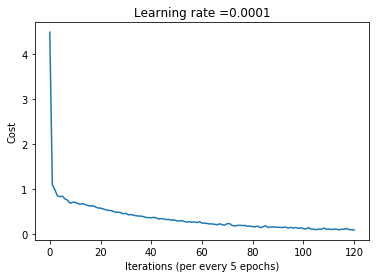

In [92]:
# Three layer NN
dimensionDict = {}
dimensionDict["numberInputs"] = 12288
dimensionDict['hiddenLayerSizes'] = [25, 12, 1]

modelCosts, trainAcc, testAcc = model(trainingData, trainingLabels, testData, testLabels, dimensionDict, 0.0001, 601, 50, 0.86, True)

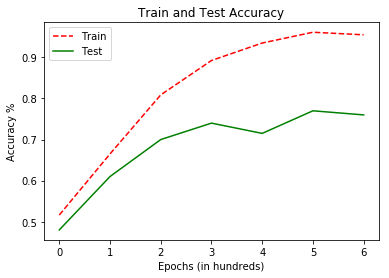

In [93]:
plt.xlabel('Epochs (in hundreds)')
plt.ylabel('Accuracy %')
plt.plot(np.squeeze(trainAcc), 'r--', np.squeeze(testAcc), 'g')
plt.title('Train and Test Accuracy')
plt.legend(['Train', 'Test'])

plt.show()

### Comments

Definitely a big improvement, and this is the best accuracy rating we've seen to date on our data set.

# Next steps

Our next steps will be to build a model using Keras, and then to develop a test harness for tuning and optimization.  This will hopefully allow us to zero in on the best model parameters to implement, and hopefully the classification accuracy will continue to improve.